# Region Perturbation

Demo of Region Perturbation algorithm with inpainting and random perturbation modes.

In [1]:
%load_ext autoreload
%autoreload 2

## LRP

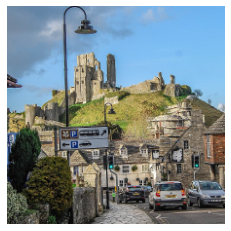

Finished 'relevance' in 0.4332 secs


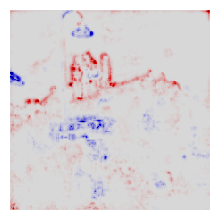

In [2]:
from typing import Callable, Dict, List, Tuple, Union

import numpy
import torch
import torchvision
from matplotlib import pyplot as plt

import lrp.plot
from lrp import image, rules
from lrp.core import LRP
from lrp.filter import LayerFilter
from lrp.rules import LrpEpsilonRule, LrpGammaRule, LrpZBoxRule, LrpZeroRule
from lrp.zennit.types import AvgPool, Linear

# Input data
# Image is in RGB mode with range [0,1]
img_bgr_hwc_float_0_1: numpy.array = image.load_img_norm_zero_one(
    '../../../data/castle.jpg')
X = lrp.norm.ImageNetNorm.transform(img_bgr_hwc_float_0_1)
# Simulate batch by adding a new dimension
X = torch.unsqueeze(X, 0)

plt.axis('off')
lrp.plot.plot_imagenet(X)

# Model
model = torchvision.models.vgg16(pretrained=True)
model.eval()

# Low and high parameters for zB-rule
batch_size: int = 1
shape: Tuple[int] = (batch_size, 3, 224, 224)

low: torch.Tensor = lrp.norm.ImageNetNorm.normalize(torch.zeros(*shape))
high: torch.Tensor = lrp.norm.ImageNetNorm.normalize(torch.ones(*shape))

# Init layer filter
vgg16_target_types: Tuple[type] = (Linear, AvgPool)
filter_by_layer_index_type: LayerFilter = LayerFilter(model)
filter_by_layer_index_type.set_target_types(vgg16_target_types)

name_map: List[Tuple[List[str], rules.LrpRule,
                     Dict[str, Union[torch.Tensor, float]]]]
name_map = [
    (filter_by_layer_index_type(lambda n: n == 0), LrpZBoxRule, {'low': low, 'high': high}),
    (filter_by_layer_index_type(lambda n: 1 <= n <= 16), LrpGammaRule, {'gamma': 0.25}),
    (filter_by_layer_index_type(lambda n: 17 <= n <= 30), LrpEpsilonRule, {'epsilon': 0.25}),
    (filter_by_layer_index_type(lambda n: 31 <= n), LrpZeroRule, {}),
]

lrp_instance: LRP = LRP(model)
lrp_instance.convert_layers(name_map)
R: torch.Tensor = lrp_instance.relevance(X)
lrp_instance.heatmap(R, width=2, height=2)

## Region Perturbation

Try Region Perturbation with inpainting enabled.

Finished '_flip' in 0.4086 secs
Finished '_flip' in 0.3254 secs
Finished '_flip' in 0.2514 secs
Finished '_flip' in 0.2201 secs
Finished '_flip' in 0.2029 secs
Finished '_flip' in 0.1765 secs
Finished '_flip' in 0.1670 secs
Finished '_flip' in 0.1928 secs
Finished '_flip' in 0.1729 secs
Finished '_flip' in 0.1680 secs
Finished '_flip' in 0.1716 secs
Finished '_flip' in 0.2080 secs
Finished '_flip' in 0.3484 secs
Finished '_flip' in 0.2032 secs
Finished '_flip' in 0.2048 secs
Finished '_flip' in 0.1671 secs
Finished '_flip' in 0.2161 secs
Finished '_flip' in 0.1608 secs
Finished '_flip' in 0.2192 secs
Finished '_flip' in 0.2774 secs
Finished '_flip' in 0.3518 secs
Finished '_flip' in 0.2088 secs
Finished '_flip' in 0.3075 secs
Finished '_flip' in 0.1920 secs
Finished '_flip' in 0.1942 secs
Finished '_flip' in 0.2938 secs
Finished '_flip' in 1.6735 secs
Finished '_flip' in 2.1898 secs
Finished '_flip' in 0.3620 secs
Finished '__call__' in 10.4899 secs
Finished 'calculate_auc_score' in 0.

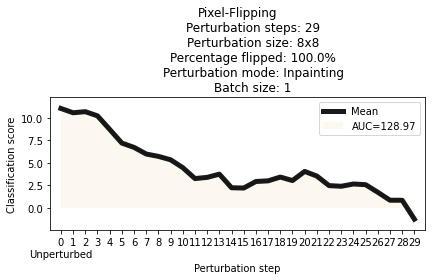

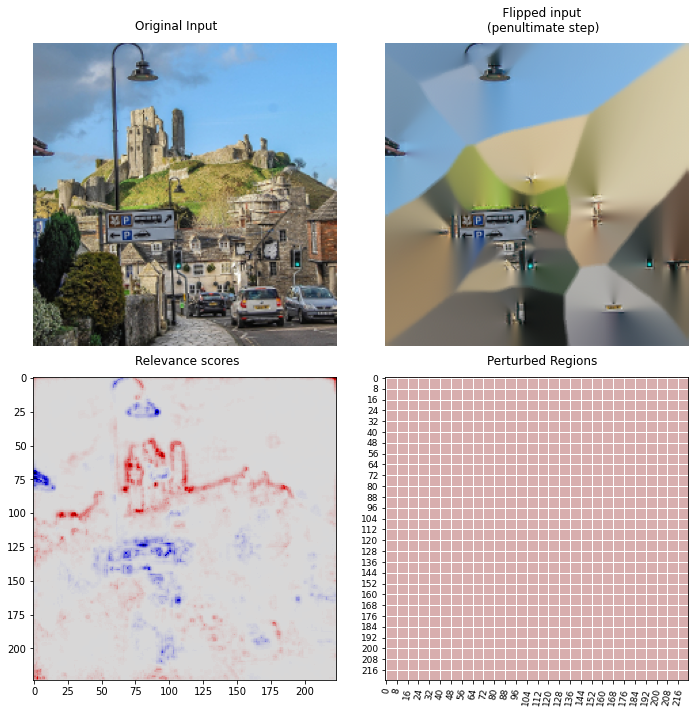

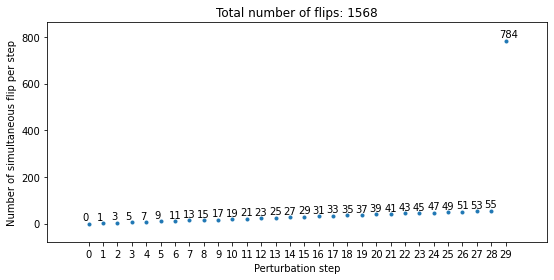

In [3]:
# %%script false --no-raise-error

from pf.core import PixelFlipping
# Parameters for cell: input_nchw, relevance_scores_nchw, lrp_instance
from pf.perturbation_modes.constants import PerturbModes

perturbation_steps: int = 29
perturbation_size: int = 8

pixel_flipping_instance: PixelFlipping = PixelFlipping(perturbation_steps=perturbation_steps,
                                                       perturbation_size=perturbation_size,
                                                       perturb_mode=PerturbModes.INPAINTING)
input_nchw: torch.Tensor = X.clone().detach()

# Enable reproducibility
torch.manual_seed(42)

relevance_scores_nchw: torch.Tensor = R.clone().detach()

# Function should return the (single-class) classification score for
# the given input to measure the difference between flips.
forward_pass: Callable[[torch.Tensor], float]
def forward_pass(input_nchw): return lrp_instance.model(input_nchw)[:, 483]


# Run Pixel-Flipping algorithm
pixel_flipping_instance(input_nchw, relevance_scores_nchw, forward_pass)
pixel_flipping_instance.plot_class_prediction_scores()
pixel_flipping_instance.plot_image_comparison()
pixel_flipping_instance.plot_number_of_flips_per_step()

Finished '_flip' in 0.2708 secs
Finished '_flip' in 0.1935 secs
Finished '_flip' in 0.1745 secs
Finished '_flip' in 0.1598 secs
Finished '_flip' in 0.1568 secs
Finished '_flip' in 0.4354 secs
Finished '_flip' in 0.7652 secs
Finished '_flip' in 0.4589 secs
Finished '_flip' in 0.7260 secs
Finished '_flip' in 0.2571 secs
Finished '_flip' in 0.2262 secs
Finished '_flip' in 0.4466 secs
Finished '_flip' in 0.4080 secs
Finished '_flip' in 0.5091 secs
Finished '_flip' in 0.3619 secs
Finished '_flip' in 0.5241 secs
Finished '_flip' in 0.3750 secs
Finished '_flip' in 0.5474 secs
Finished '_flip' in 0.3413 secs
Finished '_flip' in 0.5368 secs
Finished '_flip' in 0.4274 secs
Finished '_flip' in 0.5762 secs
Finished '_flip' in 0.3680 secs
Finished '_flip' in 0.4546 secs
Finished '_flip' in 0.3471 secs
Finished '_flip' in 0.6287 secs
Finished '_flip' in 0.3722 secs
Finished '_flip' in 0.4508 secs
Finished '_flip' in 0.3346 secs
Finished '__call__' in 13.2075 secs
Finished 'calculate_auc_score' in 0.

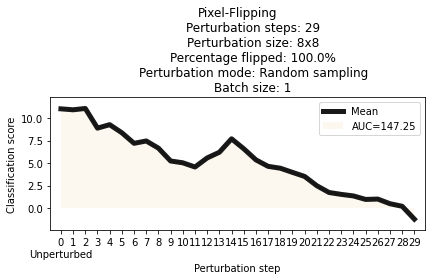

WARNING   Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


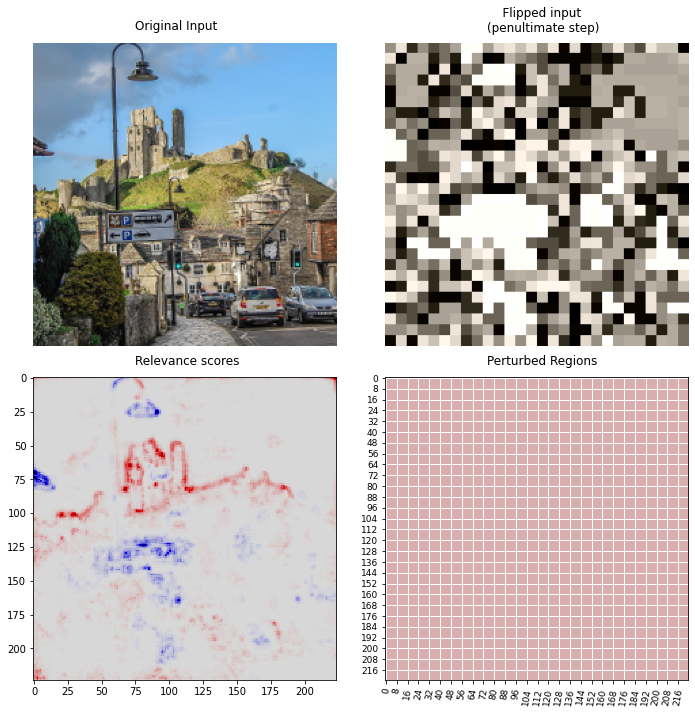

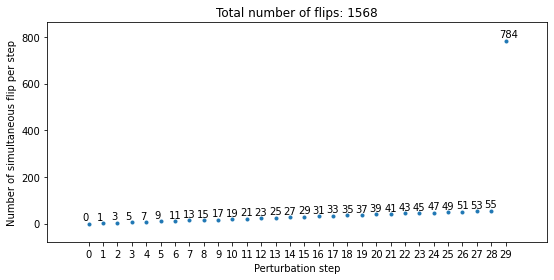

In [4]:
# %%script false --no-raise-error

from pf.core import PixelFlipping
# Parameters for cell: input_nchw, relevance_scores_nchw, lrp_instance
from pf.perturbation_modes.constants import PerturbModes

perturbation_steps: int = 29
perturbation_size: int = 8

pixel_flipping_instance: PixelFlipping = PixelFlipping(perturbation_steps=perturbation_steps,
                                                       perturbation_size=perturbation_size,
                                                       perturb_mode=PerturbModes.RANDOM)
input_nchw: torch.Tensor = X.clone().detach()

# Enable reproducibility
torch.manual_seed(42)

relevance_scores_nchw: torch.Tensor = R.clone().detach()

# Function should return the (single-class) classification score for
# the given input to measure the difference between flips.
forward_pass: Callable[[torch.Tensor], float]
def forward_pass(input_nchw): return lrp_instance.model(input_nchw)[:, 483]


# Run Pixel-Flipping algorithm
pixel_flipping_instance(input_nchw, relevance_scores_nchw, forward_pass)
pixel_flipping_instance.plot_class_prediction_scores()
pixel_flipping_instance.plot_image_comparison()
pixel_flipping_instance.plot_number_of_flips_per_step()